#Archisha Sinha

##Domain: Computer Vision
##Topic: SIFT Key Pount Descriptor

## Experiment 4: Determine Corners Key Points of the given Image and match them with rotated, downscaled and cropped image

###Task 1: Determine SIFT descriptor of the given image

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import imutils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


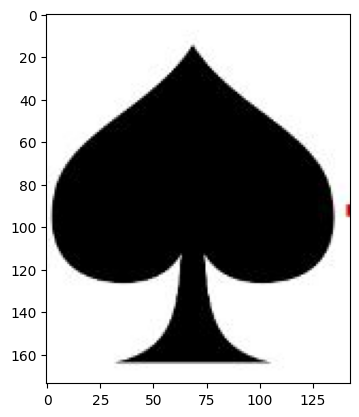

In [ ]:
image_path = '/content/drive/MyDrive/Archisha- Semester 7/AA-Labs/CV/card1.JPG'
img = cv2.imread(image_path)
image1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(image1, cmap='gray')
plt.show()

In [ ]:
# Initialize SIFT detector
sift1 = cv2.xfeatures2d.SIFT_create(contrastThreshold = 0.2)
k1,d1 = sift1.detectAndCompute(image1, None)

d1.shape

(23, 128)

This shows that it has detected 31 keypoint (or features) and each keypoint has the corresponding descriptor of size 128

In [ ]:
image1_c = image1.copy()      #making a copy of the original image

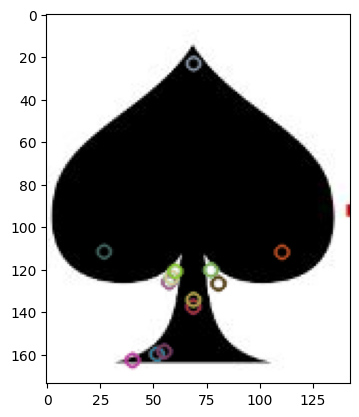

In [ ]:
cv2.drawKeypoints(image1,k1,image1_c)
plt.imshow(image1_c, cmap='gray')
plt.show()

###Task 2: scale, rotate and crop the given image. Determine SIFT descriptors

#### Downscaled Image 2

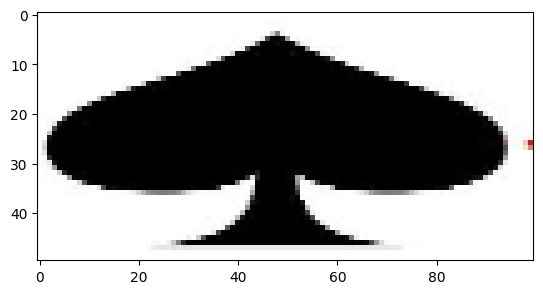

In [ ]:
image2 = cv2.resize(image1, (100,50))
plt.imshow(image2, cmap='gray')
plt.show()

In [ ]:
k2,d2 = sift1.detectAndCompute(image2, None)
d2.shape

(7, 128)

In [ ]:
image2_c = image2.copy()      #making a copy of the image2

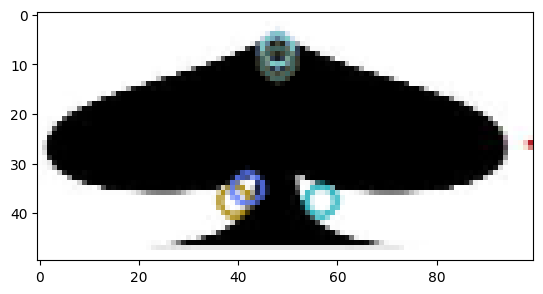

In [ ]:
cv2.drawKeypoints(image2,k2,image2_c)
plt.imshow(image2_c, cmap='gray')
plt.show()

#### Rotated Image 3

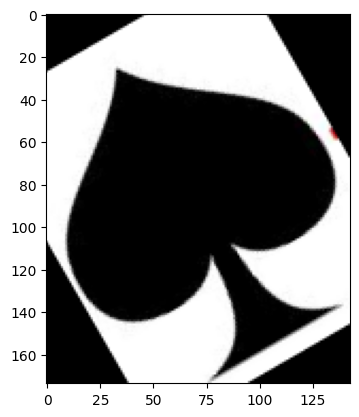

In [ ]:
image3 = imutils.rotate(image1, 30)
plt.imshow(image3, cmap='gray')
plt.show()

In [ ]:
k3,d3 = sift1.detectAndCompute(image_3, None)
d3.shape

(21, 128)

In [ ]:
image3_c = image3.copy()      #making a copy of the image3

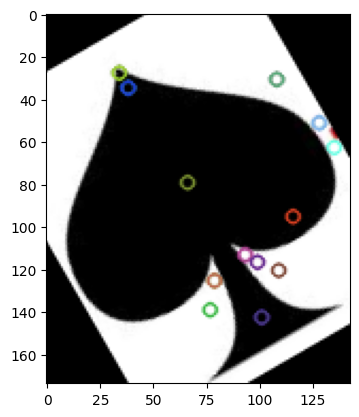

In [ ]:
cv2.drawKeypoints(image3,k3,image3_c)
plt.imshow(image3_c, cmap='gray')
plt.show()

#### Cropped Image 4

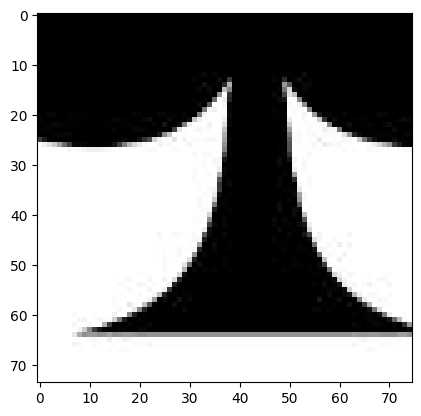

In [ ]:
image4 = image1[100:, 25:100]
plt.imshow(image4, cmap='gray')
plt.show()

In [ ]:
k4,d4 = sift1.detectAndCompute(image4, None)
d4.shape

(14, 128)

In [ ]:
image4_c = image4.copy()      #making a copy of the image4

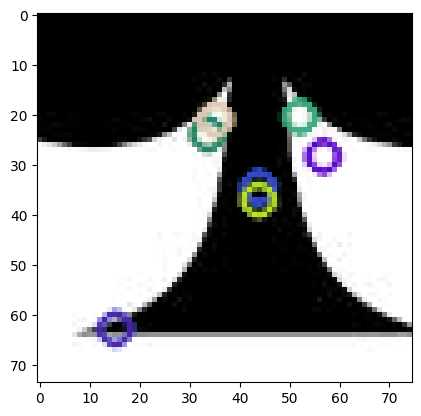

In [ ]:
cv2.drawKeypoints(image4,k4,image4_c)
plt.imshow(image4_c, cmap='gray')
plt.show()

###Task 3: Match SIFT descriptors of original and modified images

#### Inforce Brute Force matcher

In [ ]:
bf = cv2.BFMatcher()    #finds the euclidian dist bet 2 vectors
m1_2 = bf.match(d1,d2)    #matches the descriptors bet img 1 and img 2
m1_3 = bf.match(d1,d3)  # matches the descriptors bet img 1 and img 3
m1_4 = bf.match(d1,d4)  # matches the descriptors bet img 1 and img 4

In [ ]:
m1_2 = sorted(m1_2, key = lambda val:val.distance)
m1_3 = sorted(m1_3, key = lambda val:val.distance)
m1_4 = sorted(m1_4, key = lambda val:val.distance)

In [ ]:
# These are the output of the matched keypoints bet the original image and other image 2,3,4
out1_2 = cv2.drawMatches(image1,k1,image2,k2,m1_2[:5],None)     #Taking top 5 matches having min euclidean dist
out1_3 = cv2.drawMatches(image1,k1,image3,k3,m1_3[:5],None)
out1_4 = cv2.drawMatches(image1,k1,image4,k4,m1_4[:5],None)

In [ ]:
print(f"Output 1_2: {out1_2.shape}")
print(f"Output 1_3: {out1_3.shape}")
print(f"Output 1_4: {out1_4.shape}")

Output 1_2: (174, 243, 3)
Output 1_3: (174, 286, 3)
Output 1_4: (174, 218, 3)


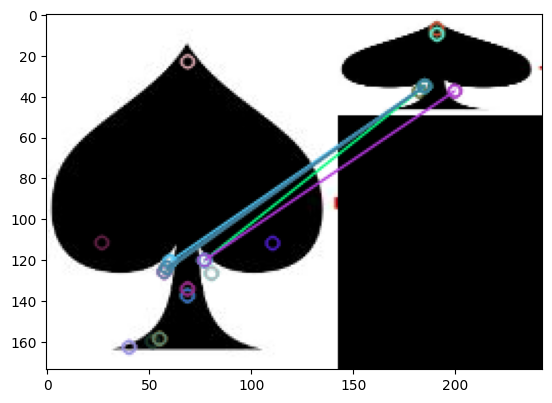

In [ ]:
plt.imshow(out1_2)
plt.show()

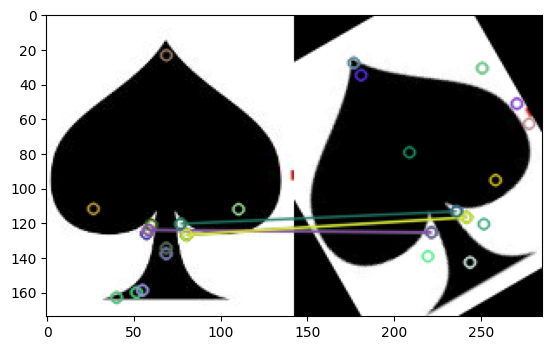

In [ ]:
plt.imshow(out1_3)
plt.show()

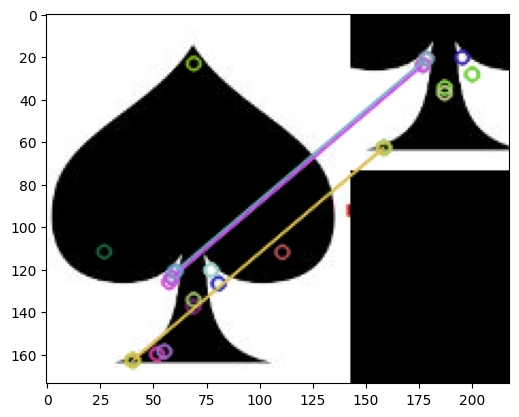

In [ ]:
plt.imshow(out1_4)
plt.show()

- If we put a contrast threshold, thus there are some False Images.
- Each image has some threshold to eliminate the False Matches.



###Task 4: Observe the matching points


### CONCLUSION
- SIFT is used to identify the location of keypoints and to determine the descriptor of each KP for the given image
- It identifies 31 KPs with length of Feature Descriptor of 128 of each KP of the original image.
- Then the original image is modifies to Resize , Rotate, and Cropped (img3).
- Then SIFT descriptor are determined for all the 3 modified images.
-  The Brute Force Matcher is used to match the KP of Image1 (original), and each of 3 modified images.
- Top 5 Matches with min euclidean distance show correct matches except 1 False Match in the Image 2 when compareed with the original image.
- Now, when the sift is added with contrastThreshold = 0.2, the False Match has disappeard
- Default ContastThreshold = 0.03, if increased to 0.2, then False match Disappears.